NearestNeighbors用法:
可以參考[這邊](http://cwiki.apachecn.org/pages/viewpage.action?pageId=10814121#NearestNeighbors(%E6%9C%80%E8%BF%91%E9%82%BB)-NearestNeighbors(%E6%9C%80%E8%BF%91%E9%82%BB))

Feature的shape =(6, 4)
Feature裡面所有第一維的list = [-3 -2 -1  1  2  3]
destFeature的shape = (4,)


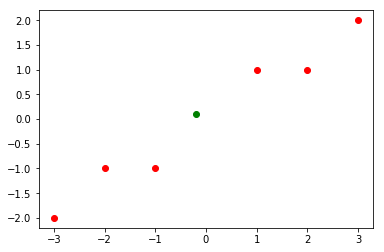

In [0]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# 建立六個假的feature點,shape=(6, 4)
Features = []
Features.append([-3, -2, 1, 1])
Features.append([-2, -1, 1, 1])
Features.append([-1, -1, 1, 1])
Features.append([1, 1, 1, 1])
Features.append([2, 1, 1, 1])
Features.append([3, 2, 1, 1])
Features = np.array(Features)
print('Feature的shape =' + str(Features.shape) )

# Feature裡面所有第一維的list
print('Feature裡面所有第一維的list = ' + str(Features[:,0]) )

# 畫出Feature裡面所有第一維,第二維為紅色,應該有六個點
plt.plot(Features[:,0], Features[:,1], 'ro') # ro代表 red o

# 要比對的目標feature, 綠色的一個點
destFeature = np.array([-0.2, 0.1, 1, 1])

# 要比對的目標destFeature的shape
print('destFeature的shape = ' + str(destFeature.shape))

plt.plot(destFeature[0], destFeature[1], 'go') # go代表 green o

plt.show()

In [0]:
# 使用NearestNeighbors要給
# n_neighbors 代表找最近的2個點
# 要餵給Features
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(Features)

# 將destFeature shape從(4,)變成(1,4)
destFeature = np.array([destFeature])
print('destFeature的shape變成' + str(destFeature.shape))

distances, indices = nbrs.kneighbors(destFeature)
print('distances的shape=' + str(distances.shape))
print('indices的shape=' + str(indices.shape))

# indices 會列出shape=(1, n_neighbors) 個index
# 代表離destFeature最近的n_neighborse個feature的index
# 此例shape=(1,2), 最近的index是第二個跟第三個
print('indices=' + str(indices))

# distance 會列出shape=(1, n_neighbors) 個距離
# 代表離destFeature最近的n_neighborse個feature的距離
# 此例shape=(1,2), 最近的distance是第二個跟第三個
print('最近的distances=' + str(distances))


destFeature的shape變成(1, 4)
distances的shape=(1, 2)
indices的shape=(1, 2)
indices=[[2 3]]
最近的distances=[[1.36014705 1.5       ]]


pairwise_distances的用法,可參考[這裡](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.paired_distances.html)

Samples的shape =(6, 4)
Samples裡面所有第一維的list = [-3 -2 -1  1  2  3]
destSample的shape = (4,)


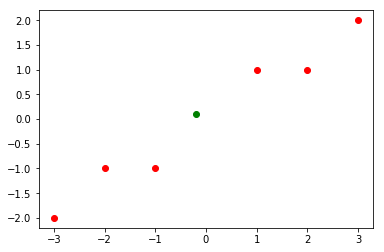

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances

# 建立六個假的sample點,shape=(6, 4)
Samples = []
Samples.append([-3, -2, 1, 1])
Samples.append([-2, -1, 1, 1])
Samples.append([-1, -1, 1, 1])
Samples.append([1, 1, 1, 1])
Samples.append([2, 1, 1, 1])
Samples.append([3, 2, 1, 1])
Samples = np.array(Samples)
print('Samples的shape =' + str(Samples.shape) )

# Samples裡面所有第一維的list
print('Samples裡面所有第一維的list = ' + str(Samples[:,0]) )

# 畫出Samples裡面所有第一維,第二維為紅色,應該有六個點
plt.plot(Samples[:,0], Samples[:,1], 'ro') # ro代表 red o

# 要比對的目標destSample, 綠色的一個點
destSample = np.array([-0.2, 0.1, 1, 1])

# destSample的shape
print('destSample的shape = ' + str(destSample.shape))

plt.plot(destSample[0], destSample[1], 'go') # go代表 green o

plt.show()

In [12]:
# 將destSample的shape升為 (4,) => (1,4)
destSample = destSample.reshape(1, -1)
print('升維後destSample的shape = ' + str(destSample.shape))

# 算出一個destSample(n_sample, n_feature)=(1,4) 至 六個Samples(n_sample, n_feature)=(6,4)的距離,
# 因此回傳結果distances.shape = (1,6)
distances = pairwise_distances(destSample, Samples)
print('distances.shape = ' + str(distances.shape))

# distances由左至右依序列出destSample與六個Samples的距離
print('distances = ' + str(distances))

升維後destSample的shape = (1, 4)
distances.shape = (1, 6)
distances = [[3.5        2.10950231 1.36014705 1.5        2.37697286 3.72155881]]
